In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn import datasets

In [3]:
boston = datasets.load_boston()

C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

In [4]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
price = pd.DataFrame(boston.target)

In [7]:
data = pd.concat([data, price], axis=1)

In [8]:
data.rename(columns={0:'Price'}, inplace=True)

In [9]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [10]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [11]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [13]:
discrete_features = [feature for feature in data.columns if data[feature].nunique()<15]

In [14]:
continuous_features = [feature for feature in data.columns if feature not in ['CHAS', 'RAD', 'Price']]
continuous_features = data[continuous_features]

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

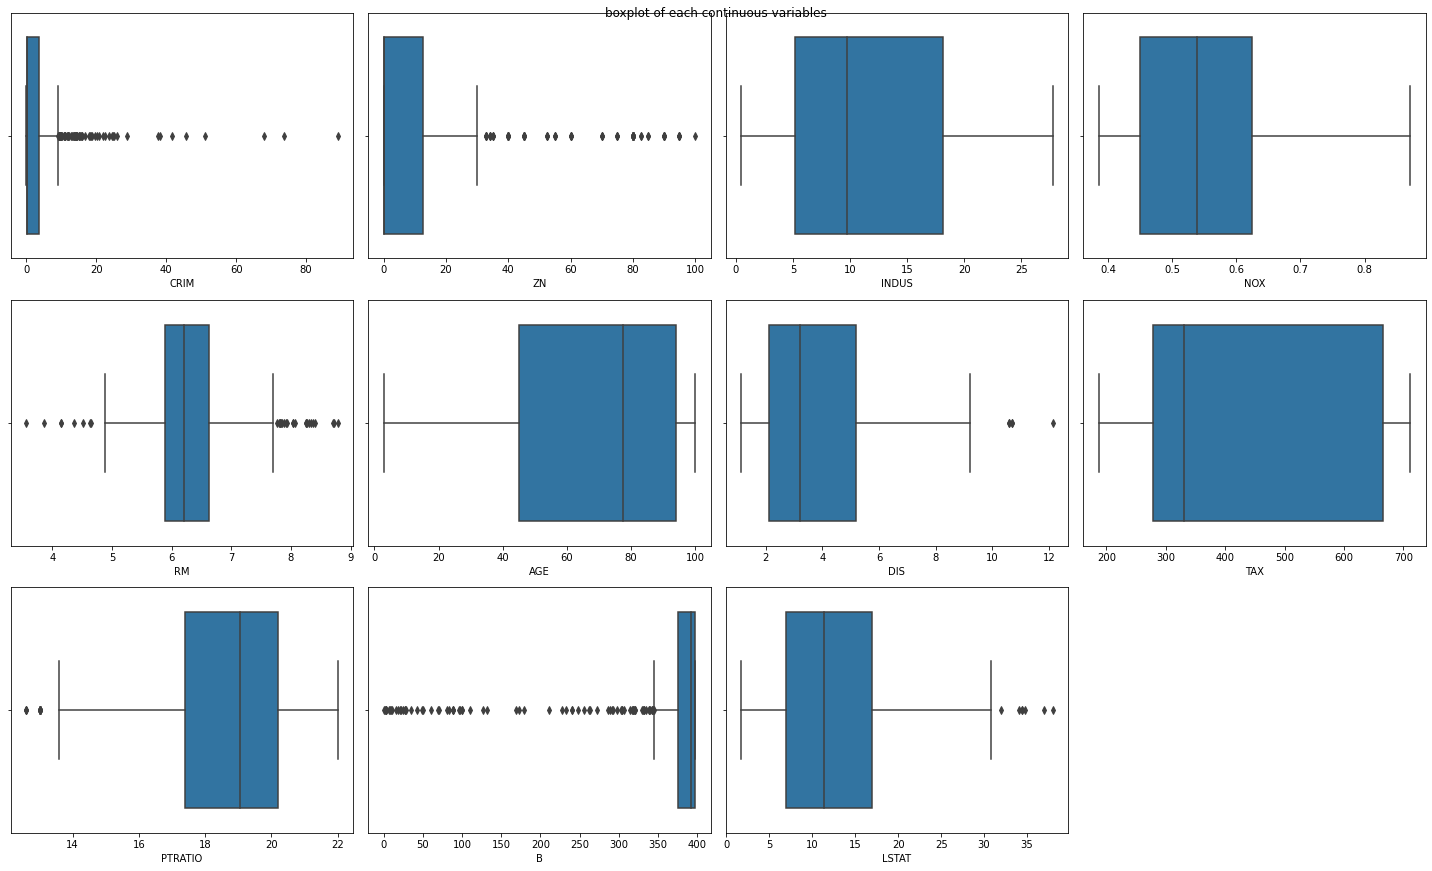

In [15]:
#drawing boxplot to see the number of outliers present in the datasets
plt.figure(figsize=(20,20))
plt.suptitle('boxplot of each continuous variables')

for i in range(len(continuous_features.columns)):
    plt.subplot(5,4,i+1)
    sns.boxplot(continuous_features[continuous_features.columns[i]])
    plt.tight_layout()

In [16]:
#removing the extreme outliers on the continuous variables 
for feature in continuous_features.columns:
    lower_quantile = data[feature].quantile(0.25)
    upper_quantile = data[feature].quantile(0.75)
    inter_quantile = upper_quantile-lower_quantile
    lower_boundary = lower_quantile-(3*inter_quantile)
    upper_boundary = upper_quantile+(3*inter_quantile)
    data.loc[data[feature]>upper_boundary, feature] = np.nan
    data.loc[data[feature]<lower_boundary, feature] = np.nan

In [17]:
continuous_features.isnull().sum()

CRIM       0
ZN         0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [18]:
discrete_features = data[discrete_features]

In [19]:
y = data['Price']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [20]:
data1 = pd.concat([continuous_features, discrete_features, y], axis=1)

In [21]:
data1.isnull().sum()

CRIM       0
ZN         0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
CHAS       0
RAD        0
Price      0
dtype: int64

In [22]:
data1.dropna(inplace=True)

In [23]:
data1.shape

(506, 14)

In [24]:
data.shape

(506, 14)

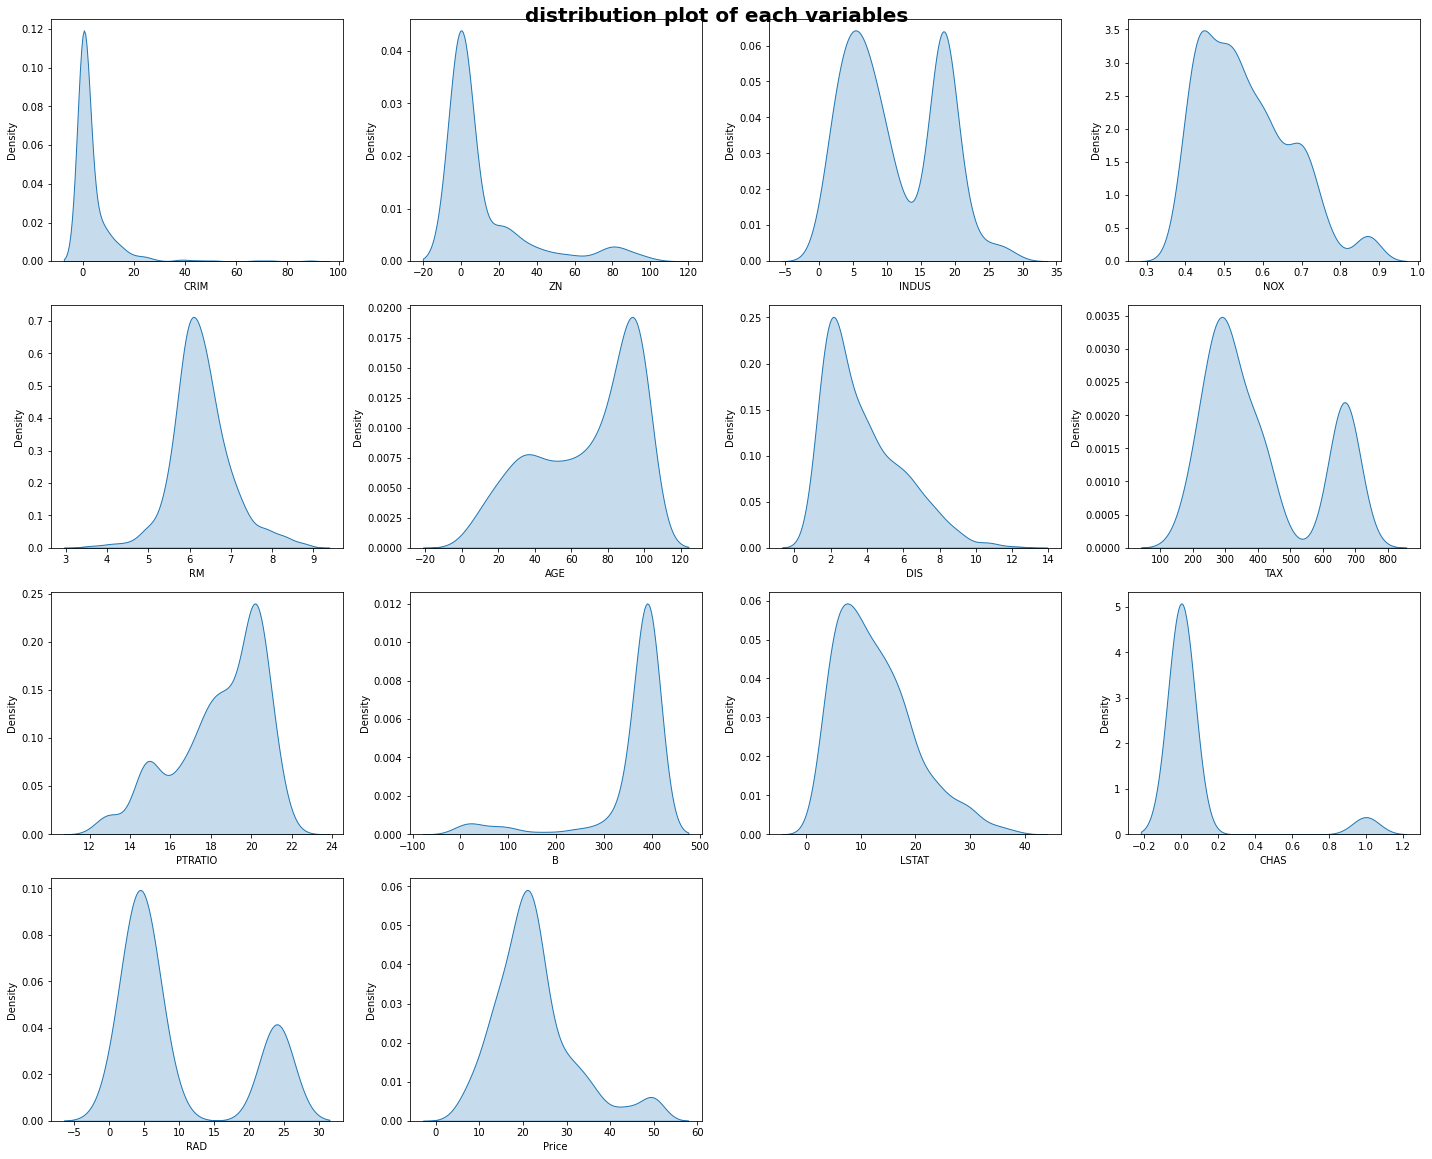

In [25]:
#drawing distribution plot to see the distribution of the dataset
plt.figure(figsize=(20,20))
plt.suptitle('distribution plot of each variables', fontsize=20, fontweight='bold')

for i in range(len(data1.columns)):
    plt.subplot(5,4,i+1)
    sns.kdeplot(data1[data1.columns[i]], shade=True)
    plt.tight_layout()

In [26]:
data1.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,CHAS,RAD,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,0.069170,9.549407,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,0.253994,8.707259,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,0.000000,1.000000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,0.000000,4.000000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,0.000000,5.000000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,0.000000,24.000000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,1.000000,24.000000,50.000000


In [27]:
from scipy.stats import boxcox

In [28]:
data1.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B',
       'LSTAT', 'CHAS', 'RAD', 'Price'],
      dtype='object')

In [29]:
for feature in ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B','LSTAT']:
    data1[feature], opt = boxcox(data1[feature]+1)

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
min = MinMaxScaler()

In [32]:
data1['CHAS'] = min.fit_transform(data1['CHAS'].array.reshape(-1,1))

In [33]:
data1['RAD'] = min.fit_transform(data1['RAD'].array.reshape(-1,1))

In [34]:
data1.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,CHAS,RAD,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,5.060000e+02,506.000000,506.000000,506.000000,506.000000
mean,0.387794,0.279617,3.870199,0.205834,2.808501,250.808650,1.061742,1.806202,179979.220988,1.433708e+09,3.044980,0.069170,0.371713,22.532806
std,0.361587,0.466525,1.547323,0.012258,0.186378,125.119011,0.209567,0.016810,75681.487617,5.130018e+08,0.785591,0.253994,0.378576,9.197104
min,0.006281,0.000000,0.406933,0.182674,1.974607,3.966755,0.641038,1.771433,32179.971747,4.908759e-01,1.085964,0.000000,0.000000,5.000000
25%,0.075960,0.000000,2.627042,0.194009,2.706329,136.162932,0.887180,1.793916,127619.869753,1.424866e+09,2.441546,0.000000,0.130435,17.025000
50%,0.205179,0.000000,3.838815,0.206166,2.794154,283.166349,1.058917,1.802036,188767.439718,1.668574e+09,3.069515,0.000000,0.173913,21.200000
75%,0.807667,0.999915,5.432896,0.215011,2.903221,368.093123,1.244780,1.829203,243388.276254,1.746751e+09,3.635169,0.000000,1.000000,25.000000
max,1.033994,1.087677,6.785222,0.230777,3.414035,399.847329,1.526397,1.831259,352862.835818,1.757992e+09,4.917958,1.000000,1.000000,50.000000


In [35]:
data1.CHAS

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: CHAS, Length: 506, dtype: float64

In [36]:
data1.RAD

0      0.000000
1      0.043478
2      0.043478
3      0.086957
4      0.086957
         ...   
501    0.000000
502    0.000000
503    0.000000
504    0.000000
505    0.000000
Name: RAD, Length: 506, dtype: float64

In [37]:
data1.corr()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,CHAS,RAD,Price
CRIM,1.000000,-0.480818,0.732133,0.809461,-0.290630,0.649407,-0.724989,0.810889,0.420658,-0.531695,0.575843,0.029174,0.883338,-0.428917
ZN,-0.480818,1.000000,-0.623830,-0.601773,0.327073,-0.547859,0.609066,-0.385288,-0.455923,0.251121,-0.458599,-0.040080,-0.350772,0.375807
INDUS,0.732133,-0.623830,1.000000,0.788570,-0.418815,0.662094,-0.758193,0.685052,0.449288,-0.402748,0.628209,0.074840,0.601271,-0.509471
NOX,0.809461,-0.601773,0.788570,1.000000,-0.312521,0.794761,-0.876359,0.651154,0.333735,-0.421555,0.610828,0.076285,0.629333,-0.429656
RM,-0.290630,0.327073,-0.418815,-0.312521,1.000000,-0.255583,0.275037,-0.303455,-0.341721,0.176629,-0.652701,0.087059,-0.217097,0.676939
AGE,0.649407,-0.547859,0.662094,0.794761,-0.255583,1.000000,-0.790599,0.498273,0.331380,-0.324002,0.624229,0.083434,0.466232,-0.384326
DIS,-0.724989,0.609066,-0.758193,-0.876359,0.275037,-0.790599,1.000000,-0.586367,-0.297443,0.367225,-0.546678,-0.084369,-0.565584,0.296892
TAX,0.810889,-0.385288,0.685052,0.651154,-0.303455,0.498273,-0.586367,1.000000,0.451886,-0.440962,0.514600,-0.037440,0.826948,-0.473259
PTRATIO,0.420658,-0.455923,0.449288,0.333735,-0.341721,0.331380,-0.297443,0.451886,1.000000,-0.179686,0.441107,-0.131876,0.480894,-0.511193
B,-0.531695,0.251121,-0.402748,-0.421555,0.176629,-0.324002,0.367225,-0.440962,-0.179686,1.000000,-0.373868,0.029548,-0.437564,0.324452


<AxesSubplot:>

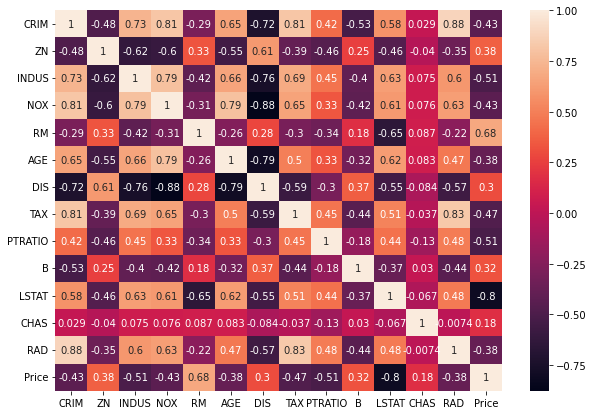

In [38]:
plt.figure(figsize=(10,7))
sns.heatmap(data1.corr(), annot=True)

In [39]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [40]:
linear = LinearRegression()

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
data1.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B',
       'LSTAT', 'CHAS', 'RAD', 'Price'],
      dtype='object')

In [43]:
x = data1.drop('Price', axis=1)

In [44]:
x

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,CHAS,RAD
0,0.006281,1.027774,1.514756,0.206166,2.890682,224.200319,1.154678,1.796859,73458.962923,1.757992e+09,2.058391,0.0,0.000000
1,0.026600,0.000000,3.183963,0.197065,2.850510,290.105355,1.228591,1.786454,140762.652198,1.757992e+09,2.782521,0.0,0.043478
2,0.026581,0.000000,3.183963,0.197065,3.044659,205.387503,1.228591,1.786454,140762.652198,1.691013e+09,1.833656,0.0,0.043478
3,0.031378,0.000000,1.452155,0.195410,2.998295,139.321704,1.301378,1.781652,174199.594623,1.720399e+09,1.526384,0.0,0.086957
4,0.064688,0.000000,1.452155,0.195410,3.035295,174.752022,1.301378,1.781652,174199.594623,1.757992e+09,2.133595,0.0,0.086957
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.059020,0.000000,4.323211,0.210057,2.895342,242.496321,0.954725,1.792812,288150.035785,1.677427e+09,2.855545,0.0,0.000000
502,0.043353,0.000000,4.323211,0.210057,2.770356,279.220725,0.922024,1.792812,288150.035785,1.757992e+09,2.774052,0.0,0.000000
503,0.057357,0.000000,4.323211,0.210057,2.992793,351.893759,0.900046,1.792812,288150.035785,1.757992e+09,2.197320,0.0,0.000000
504,0.098999,0.000000,4.323211,0.210057,2.946883,343.022343,0.939708,1.792812,288150.035785,1.701093e+09,2.358140,0.0,0.000000


In [45]:
y = data1.Price

In [46]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=30)

In [48]:
x_train.shape

(404, 13)

In [49]:
x_test.shape

(102, 13)

In [50]:
linear.fit(x_train, y_train)

LinearRegression()

In [51]:
linear.coef_

array([ 2.46021770e+00,  3.59929186e-01, -3.80941386e-01, -1.75856023e+02,
        9.97060934e+00,  5.16513245e-03, -1.62279183e+01, -1.06700410e+02,
       -2.11981664e-05,  7.74285018e-10, -7.41246506e+00,  2.84413175e+00,
        1.99813816e+00])

In [52]:
linear.intercept_

264.0459278299452

In [53]:
linear_pred = linear.predict(x_test)

In [54]:
residual = y_test- linear_pred
residual

21     2.854755
440   -2.640804
103    0.531815
178   -1.812832
22     0.830806
         ...   
3     -1.697616
323   -0.301001
41    -3.915324
208    3.319932
442    1.460972
Name: Price, Length: 102, dtype: float64

<AxesSubplot:xlabel='Price', ylabel='Density'>

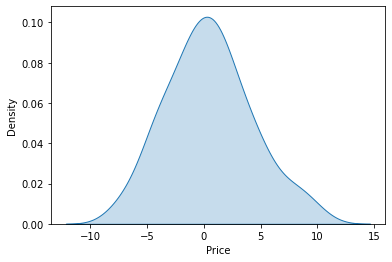

In [55]:
sns.kdeplot(residual, shade=True)

<AxesSubplot:xlabel='Price'>

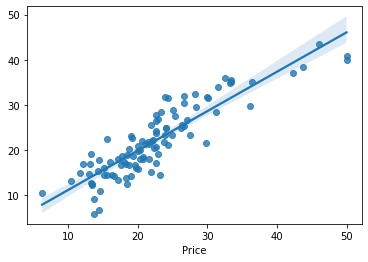

In [56]:
sns.regplot(x = y_test, y=linear_pred)

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Price'>

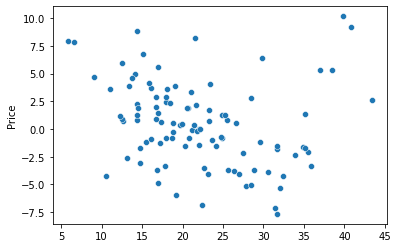

In [57]:
sns.scatterplot(linear_pred, residual)

In [58]:
from sklearn.metrics import r2_score

In [59]:
linear_scorer2 = r2_score(y_test, linear_pred)
linear_scorer2

0.774107993470641

In [60]:
adj_R2 = 1 - (1-linear_scorer2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
adj_R2 

0.7407375834151675

In [61]:
ridge = Ridge()

In [62]:
ridge.fit(x_train, y_train)

C:\anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.85471e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge()

In [63]:
ridge.coef_

array([-1.01314013e-01,  1.90116904e-01, -7.55846763e-01, -1.22242130e+00,
        9.22200210e+00,  4.79323168e-03, -9.67852304e+00, -3.10741217e+00,
       -2.15785848e-05,  8.45102098e-10, -7.80326364e+00,  2.88091342e+00,
        9.97661348e-02])

In [64]:
ridge.intercept_

40.59184460445114

In [65]:
ridge_pred = ridge.predict(x_test)
ridge_pred

array([16.92766378, 13.5742862 , 19.21374055, 31.96631946, 14.07747652,
       17.75002494, 18.55168859, 41.94480105, 13.60053372, 24.12105718,
       27.5866351 , 30.38353796, 24.14422741, 34.20139871, 13.09701327,
       25.36321121, 13.10481556, 27.23117995, 15.03973811, 27.57550111,
       22.13325605, 15.71868625, 28.77913787, 12.64942159, 15.46684414,
       13.67574608, 16.91858432,  4.14701013, 13.74803523, 11.21257044,
       15.13315602, 24.37460313, 34.0025592 , 25.34485584, 21.08710615,
       22.18197131, 12.5325753 , 20.3402624 , 19.22439654, 20.29313262,
       20.55856327, 16.58951819, 40.61648502, 26.66431324, 26.478386  ,
       21.90477709, 19.51989877, 16.74566403, 16.9084546 , 15.40167133,
       14.79032048, 17.39359941, 19.2591489 , 24.86933412, 33.52526834,
       26.13356572, 39.58640994, 30.97901718, 16.03360755, 33.24728022,
       23.07306245, 17.93002042, 27.62581229, 23.74016108, 16.56888298,
        9.7787055 , 15.35861415, 22.67720137, 37.73412006, 37.10

In [66]:
residuals = y_test-ridge_pred
residuals

21     2.672336
440   -3.074286
103    0.086259
178   -2.066319
22     1.122523
         ...   
3     -1.831360
323   -0.367590
41    -2.977955
208    3.873031
442    0.454508
Name: Price, Length: 102, dtype: float64

<AxesSubplot:xlabel='Price', ylabel='Density'>

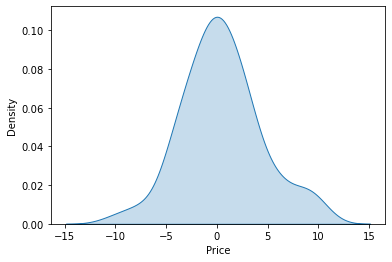

In [67]:
sns.kdeplot(residuals, shade=True)

<AxesSubplot:xlabel='Price'>

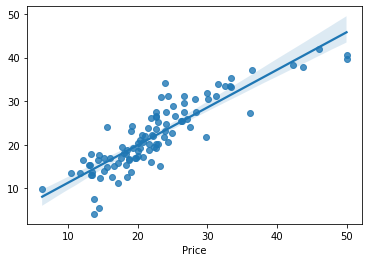

In [68]:
sns.regplot(x=y_test, y=ridge_pred)

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

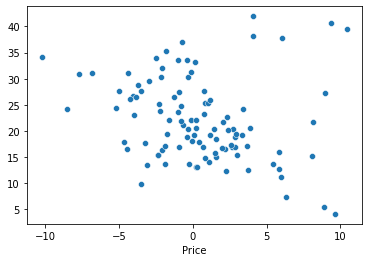

In [69]:
sns.scatterplot(residuals, ridge_pred)

In [70]:
elas = ElasticNet()

In [71]:
elas.fit(x_train, y_train)

ElasticNet()

In [72]:
elas.coef_

array([ 0.00000000e+00,  0.00000000e+00, -4.72527453e-01, -0.00000000e+00,
        1.74699792e-01,  4.66835778e-04, -0.00000000e+00, -0.00000000e+00,
       -4.05129217e-05,  2.19700503e-09, -3.36461155e+00,  0.00000000e+00,
        0.00000000e+00])

In [73]:
elas.intercept_

38.06853275394218

In [74]:
elas_pred = elas.predict(x_test)

In [75]:
residualE = y_test - elas_pred

In [76]:
residualE

21     1.744433
440   -5.863769
103    1.045353
178    1.004813
22    -1.344329
         ...   
3      3.842105
323   -3.139386
41    -1.294766
208    2.763045
442    0.388996
Name: Price, Length: 102, dtype: float64

<AxesSubplot:xlabel='Price', ylabel='Density'>

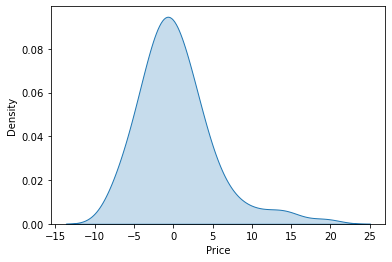

In [77]:
sns.kdeplot(residualE, shade=True)

<AxesSubplot:xlabel='Price'>

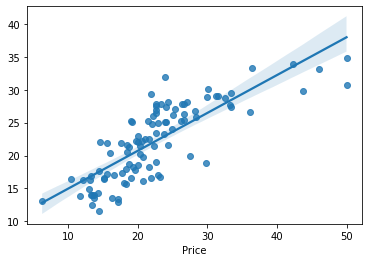

In [78]:
sns.regplot(x=y_test, y=elas_pred)

<AxesSubplot:ylabel='Price'>

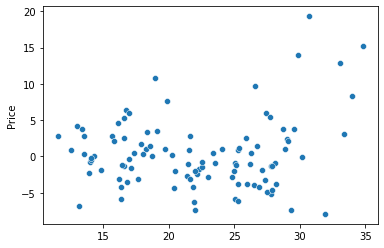

In [79]:
sns.scatterplot(x=elas_pred, y=residualE)

In [80]:
ela_score = r2_score(y_test, elas_pred)
ela_score

0.6354171263683395

In [81]:
adj_R2 = 1 - (1-ela_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
adj_R2 

0.5815582927636624